## The Sparks Foundation

## Data Science and Bussiness Analytics intern

### Name - Omprakash Verma

### Task 7 : Stock Market Prediction using Numerical and Textual Analysis

Objective: 
1. Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines
2. Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, LSTM

import warnings
warnings.filterwarnings('ignore')

### First Dataset

In [2]:
# Importing the first dataset
stock=pd.read_csv(r'C:\Users\omprakash\Documents\^BSESN.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-16,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500.0
1,2019-10-17,38647.441406,39104.691406,38557.429688,39052.058594,39052.058594,47100.0
2,2019-10-18,39087.828125,39361.058594,38963.601563,39298.378906,39298.378906,42400.0
3,2019-10-22,39233.398438,39426.468750,38924.851563,38963.839844,38963.839844,54500.0
4,2019-10-23,39063.839844,39196.671875,38866.078125,39058.828125,39058.828125,41000.0


In [3]:
#checking the null value
stock.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

Text(0.5, 1.0, 'Close Price History')

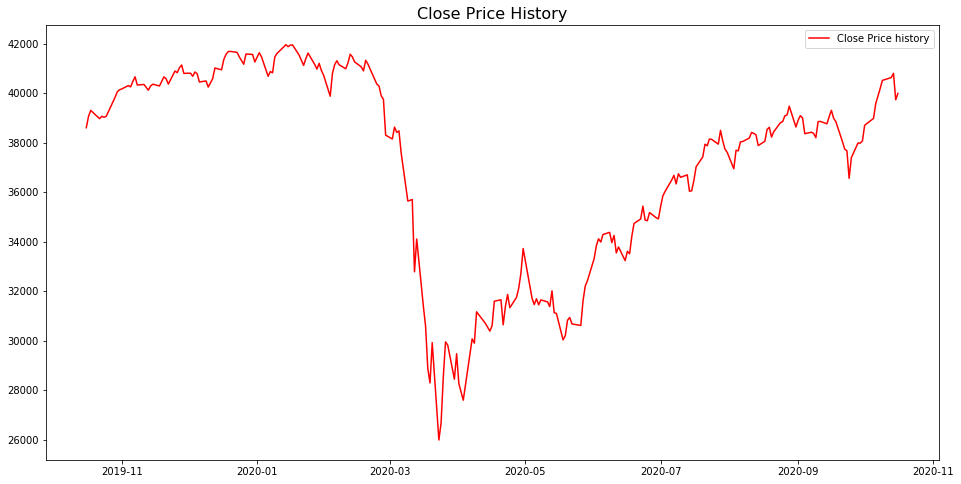

In [4]:
# Extract date frame and plot closing stock price w.r.t time
stock['Date'] = pd.to_datetime(stock.Date,format='%Y-%m-%d')
stock.index = stock['Date']
stock.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.plot(stock['Close'], label='Close Price history',color='r')
plt.legend()
plt.title('Close Price History', fontsize=16)

In [5]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(df2[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
df2 = pd.read_csv(r'C:\Users\omprakash\Documents\^BSESN.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [8]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
162/162 - 4s - loss: 0.1574
Epoch 2/100
162/162 - 1s - loss: 0.0173
Epoch 3/100
162/162 - 1s - loss: 0.0103
Epoch 4/100
162/162 - 1s - loss: 0.0056
Epoch 5/100
162/162 - 1s - loss: 0.0036
Epoch 6/100
162/162 - 0s - loss: 0.0030
Epoch 7/100
162/162 - 0s - loss: 0.0029
Epoch 8/100
162/162 - 0s - loss: 0.0028
Epoch 9/100
162/162 - 0s - loss: 0.0030
Epoch 10/100
162/162 - 0s - loss: 0.0029
Epoch 11/100
162/162 - 0s - loss: 0.0029
Epoch 12/100
162/162 - 0s - loss: 0.0029
Epoch 13/100
162/162 - 1s - loss: 0.0030
Epoch 14/100
162/162 - 1s - loss: 0.0028
Epoch 15/100
162/162 - 1s - loss: 0.0028
Epoch 16/100
162/162 - 1s - loss: 0.0030
Epoch 17/100
162/162 - 1s - loss: 0.0028
Epoch 18/100
162/162 - 1s - loss: 0.0028
Epoch 19/100
162/162 - 1s - loss: 0.0029
Epoch 20/100
162/162 - 1s - loss: 0.0029
Epoch 21/100
162/162 - 1s - loss: 0.0027
Epoch 22/100
162/162 - 1s - loss: 0.0027
Epoch 23/100
162/162 - 1s - loss: 0.0028
Epoch 24/100
162/162 - 1s - loss: 0.0028
Epoch 25/100
162/162 - 1s

In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

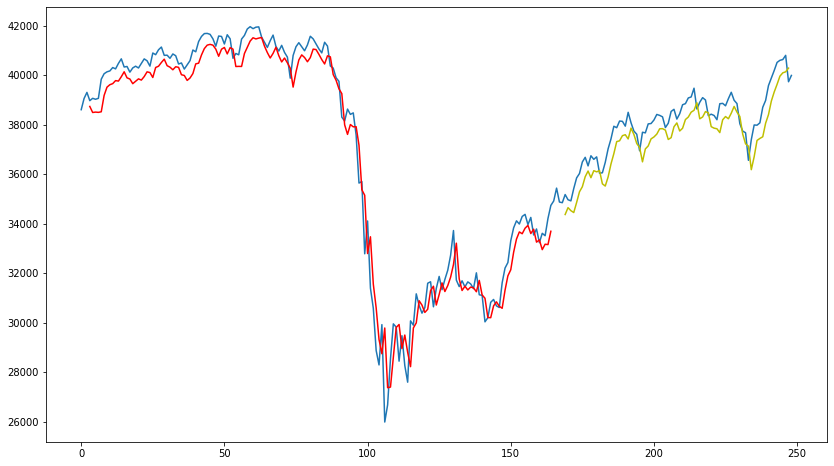

In [11]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(14,8))
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot,color='r')
plt.plot(testPredictPlot,color='y')
plt.show()

In [12]:
# calculate root mean squared error
import math
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error = ",testScore," RMSE")

Root mean square error =  791.6117863354559  RMSE
Root mean square error =  3537.0328348352596  RMSE


### Second dataset

In [13]:
# Importing the second dataset
columns=['Date','Category','News']
news=pd.read_csv(r'C:\Users\omprakash\Documents\india-news-headlines.csv',names=columns)
news.head()

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?


In [14]:
news.drop(0, inplace=True)
news.drop('Category', axis=1, inplace=True)
news.head()

,Date,News
1,20010101,win over cena satisfying but defeating underta...
2,20010102,Status quo will not be disturbed at Ayodhya; s...
3,20010102,Fissures in Hurriyat over Pak visit
4,20010102,America's unwanted heading for India?
5,20010102,For bigwigs; it is destination Goa


In [15]:
# Restructuring the date format
news['Date'] = pd.to_datetime(news['Date'],format= '%Y %m %d')
news.head()

,Date,News
1,2001-01-01,win over cena satisfying but defeating underta...
2,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,Fissures in Hurriyat over Pak visit
4,2001-01-02,America's unwanted heading for India?
5,2001-01-02,For bigwigs; it is destination Goa


In [16]:
#Grouping the headlines for each day
news['News'] = news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news = news.drop_duplicates() 
news.reset_index(inplace = True, drop = True)
news.head()

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...


In [17]:
news['News'].head(10)

0    win over cena satisfying but defeating underta...
1    Status quo will not be disturbed at Ayodhya; s...
2    Powerless north India gropes in the dark Think...
3    The string that pulled Stephen Hawking to Indi...
4    Light combat craft takes India into club class...
5    Light combat craft takes India into club class...
6    Muslim body rules out talks on Ayodhya Bajrang...
7    Sangh Parivar; Babri panel up the ante Frontru...
8    Financier Bharat Shah held for alleged links w...
9    Fend for yourselves; Pande tells doctors Burea...
Name: News, dtype: object

In [18]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor

### Adding subjectivity and polarity score

In [19]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [20]:
#Adding subjectivity and polarity columns
news['Subjectivity'] = news['News'].apply(getSubjectivity)
news['Polarity'] = news['News'].apply(getPolarity)
news.head(10)

,Date,News,Subjectivity,Polarity
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
2,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
3,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
4,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024
5,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
6,2001-01-07,Muslim body rules out talks on Ayodhya Bajrang...,0.365356,-0.060708
7,2001-01-08,Sangh Parivar; Babri panel up the ante Frontru...,0.414653,-0.019214
8,2001-01-09,Financier Bharat Shah held for alleged links w...,0.501934,-0.003837
9,2001-01-10,Fend for yourselves; Pande tells doctors Burea...,0.000000,0.000000


Text(0.5, 1.0, 'Polarity Score')

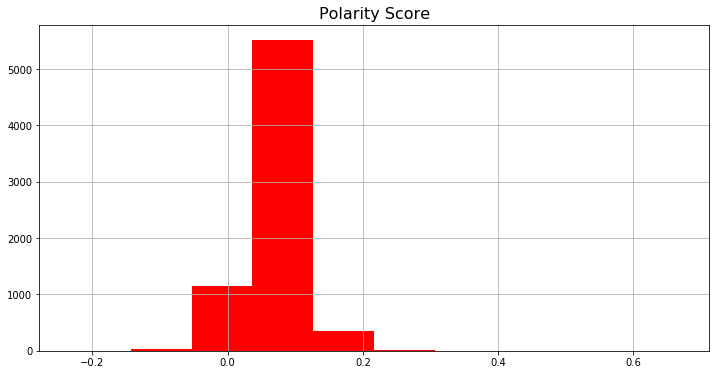

In [21]:
plt.figure(figsize = (12,6))
news['Polarity'].hist(color = 'red')
plt.title('Polarity Score', fontsize=16)

Text(0.5, 1.0, 'Subjectivity Score')

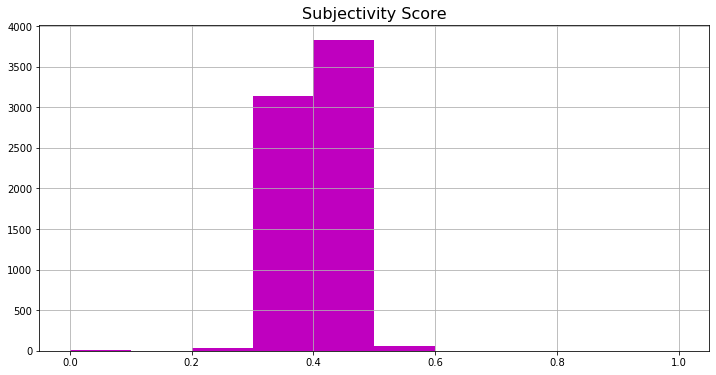

In [22]:
plt.figure(figsize = (12,6))
news['Subjectivity'].hist(color = 'm')
plt.title('Subjectivity Score', fontsize=16)

In [23]:
def sentiment(x):
    if x < 0:
        return 'negative'
    elif x == 0:
        return 'neutral'
    else:
        return 'positive'
    
news['Polarity type'] = news['Polarity'].map(lambda x : sentiment(x))

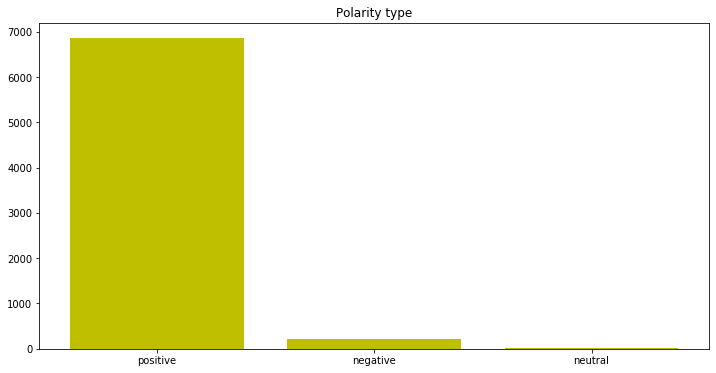

In [24]:
#plot for polarity
plt.figure(figsize=(12,6))
plt.title('Polarity type')
plt.bar(news['Polarity type'].value_counts().index, news['Polarity type'].value_counts(), color='y')
plt.show()

In [25]:
df= news[['Subjectivity', 'Polarity']]

In [26]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
dff = pd.DataFrame(mms.fit_transform(df))
dff.columns = df.columns
dff.index = df.index
dff.head()

,Subjectivity,Polarity
0,0.633333,0.740741
1,0.282333,0.427407
2,0.407692,0.357550
3,0.446847,0.356994
4,0.476612,0.550397


In [27]:
x = dff[0:249]
y = stock['Close']

In [28]:
#split dataset into train test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
x_train.shape

(199, 2)

### Random forest regressor for hybrid analysis

In [29]:
#fit model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [30]:
data = pd.DataFrame({'Actual': y_test, 'Predict': prediction})
data.head(10)

,Actual,Predict
Date,,
2020-10-16,39982.980469,34330.799219
2020-06-25,34842.101563,36156.882031
2020-02-06,41306.031250,38767.664844
2020-06-01,33303.519531,37992.421094
2020-05-22,30672.589844,39235.193750
2020-02-03,39872.308594,37810.448633
2019-12-23,41642.660156,37767.258203
2020-06-12,33780.890625,37681.738281
2020-09-03,38990.941406,37446.198828


In [31]:
print("Root mean square error = ",math.sqrt(mean_squared_error(prediction,y_test))," RMSE")

Root mean square error =  4025.9823194495257  RMSE


# Thank You !!